# Visualization 2

- Advanced visualization, example: https://trailsofwind.figures.cc/
- Custom visualization steps:
    - draw "patches" (shapes) on the screen (what):
        - lines
        - polygons
        - circle
        - text
    - location of the "patches" on the screen (where):
        - X & Y co-ordinate
        - "Coordinate Reference System (CRS)":
            - takes some X & Y and maps it on to actual space on screen
            - several CRS

### Transformers: let us pick a Coordinate Reference System (CRS)

- Documentation: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
- `ax.transData`: default
- `ax.transAxes` and `fig.transFigure`:
    - (0, 0) is bottom left
    - (1, 1) is top right
        - these are true immaterial of the axes limits
- `None` or `IdentityTransform()`: disabling CRS

### Mix and match

- `ax.transData.transform((x, y))`: converts axes / data coords into raw coordinates
- How to draw an arrow:
    `matplotlib.patches.FancyArrowPatch((<x1>, <y1>), (<x2>, (<y2>)), transform=None, arrowstyle=<STYLE>)`
    - arrowstyle="simple,head_width=10,head_length=10"

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

# new import statements
import geopandas as gpd

from shapely.geometry import Point, Polygon, box

In [ ]:
# GOAL: draw a visual circle at axes / data coords 0.5, 0.5 
# with raw co-ordinate radius 30 on right subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(0, 3)

# crop now (after .transform, we don't want to move anything!)
# plt.tight_layout() 

# Transform (0.5, 0.5) to transData CRS

print(x, y)
# Draw a circle at (x, y) with radius 30 and set transform to None


# GOAL: arrow from 0.2, 0.2 (left) to 2, 0.5 (right)
# Use axes / data coords from one subplot to another subplot

# arrowstyle="simple,head_width=10,head_length=10"
arrow = matplotlib.patches.FancyArrowPatch((x1, y1), (x2, y2), transform=None)
fig.add_artist(arrow)

### Custom Scatter Plots with Angles

In [ ]:
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0, 10)
ax.set_ylim(-1, 10)

for row in df.itertuples():
    print(row.x, row.y, row.a)
    # v1: draw a circle of radius 10 for each scatter point
    
    # v2: draw an arrow for each scatter point (correct angle)
    # x, y = ax.transData.transform((row.x, row.y))
    # Calculate angle: math.radians(row.a)
    
    # Calculate end axes / data coords using math.cos and math.sin
    
    

### Plot annotations

- Target plot:

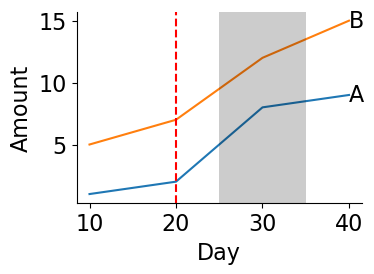

- `ax.text(<x>, <y>, <text>, ha=<someval>, va=<someval>)`
    - `ha`: horizontalalignment
    - `va`: verticalalignment
        - enables us to modify "anchor" of the text
    
### More patches
- `plt.Line2D((<x1>, <x2>), (<y1>, <y2>)))`
- `matplotlib.patches.FancyArrowPatch((<x1>, <y1>), (<x2>, (<y2>))`
- `plt.Rectangle((<x>,<y>), <width>, <height>)`

In [ ]:
plt.rcParams["font.size"] = 16
df = pd.DataFrame({"A": [1,2,8,9], "B": [5,7,12,15]}, index=[10,20,30,40])
ax = df.plot.line(figsize=(4,3))
ax.set_xlabel("Day")
ax.set_ylabel("Amount")
plt.tight_layout()
# Enables us to control borders (aka spines)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 1. Replace legened with line labels


# 2. Draw a vertical line at x=20
# color="r", linestyle="--"


# 3. Highlight a region from x=25 to x=35
# color="k", zorder=50, alpha=0.2, linewidth=0


df

### Geographic Data / Maps

#### Installation
```python
pip3 install --upgrade pip
pip3 install geopandas shapely descartes geopy netaddr
sudo apt install -y python3-rtree
```

- `import geopandas as gpd`
- `.shp` => Shapefile
- `gpd.datasets.get_path(<shp file path>)`:
    - example: `gpd.datasets.get_path("naturalearth_lowres")`
- `gpd.read_file(<path>)`

In [ ]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets/naturalearth_lowres

In [ ]:
!ls /home/msyamkumar/.local/lib/python3.10/site-packages/geopandas/datasets

In [ ]:
# Find the path for "naturalearth_lowres"
path = 
# Read the shapefile for "naturalearth_lowres" and
# set index using "name" column
gdf = 

In [ ]:
gdf.head()

In [ ]:
type(gdf).__mro__

In [ ]:
# All shapefiles have a column called "geometry"


In [ ]:
type(gdf["geometry"]).__mro__

In [ ]:
# First country's geometry
print() # index of the first country
gdf["geometry"] # geometry of the first country

In [ ]:
# Second country's geometry
print(gdf.index[1])
gdf["geometry"].iat[1]

In [ ]:
# Geometry for "United States of America"
gdf.at[<row_index>, <column_name>]

In [ ]:
# Type of Tanzania's geometry
print(gdf.index[1], type(gdf["geometry"].iat[1]))

# Type of United States of America's geometry
print("United States of America", type(gdf.at["United States of America", "geometry"]))

- `gdf.plot(figsize=(<width>, <height>), column=<column name>)`
- `ax.set_axis_off()`

In [ ]:
# Set facecolor="0.7", edgecolor="black"
ax = gdf.plot(figsize=(8,4))
# Turn off the axes
ax.set_axis_off()

In [ ]:
# Color the map based on population column and set cmap="cool" (now we need legend=True)
ax = gdf.plot(figsize=(8,4))
ax.set_axis_off()

#### Create a map where countries with >100M people are red, others are gray.

In [ ]:
# Create a map where countries with >100M people are red, others are gray

# Add a new column called color to gdf and set default value to "lightgray"

# Boolean indexing to set color to red for countries with "pop_est" > 1e8

# Create the plot
# ax = gdf.plot(figsize=(8,4), color=gdf["color"])
# ax.set_axis_off()

### Shapely shapes

- `from shapely.geometry import Point, Polygon, box`
- `Polygon([(<x1>, <y1>), (<x2>, <y2>), (<x3>, <y3>), ...])`
- `box(<x1>, <x2>, <y1>, <y2>)`
- `Point(<x>, <y>)`
- `<shapely object>.buffer(<size>)`
    - example: `Point(5, 5).buffer(3)` creates a circle
- Shapely methods:
    - `union`:  any point that is in either shape (OR)
    - `intersection`: any point that is in both shapes (AND)
    - `difference`: subtraction
    - `intersects`: do they overlap?

In [ ]:
triangle = Polygon([(0, 0), (1.2, 1), (2, 0)])   # triangle
triangle

In [ ]:
box1 = box(0,0,1,1)
box1

In [ ]:
point = Point(5, 5)
point

In [ ]:
circle = point.buffer(1)
circle

In [ ]:
triangle_buffer = triangle.buffer(3)
triangle_buffer

In [ ]:
triangle.union(box1)   # any point that is in either shape (OR)

In [ ]:
triangle.intersection(box1)   # any point that is in both shapes (AND)

In [ ]:
triangle.difference(box1)   # subtraction

In [ ]:
box1.difference(triangle)   # subtraction

In [ ]:
triangle.intersects(box1) # do they overlap?

In [ ]:
# is the point "near" (<6 units) the triangle?
triangle.union(point.buffer(6))

In [ ]:
triangle.intersects(point.buffer(6))

In [ ]:
# Europe bounding box
b = box(-10.67, 34.5, 31.55, 71.05)

# attempt 1
gdf[gdf.intersects(b)].plot()

In [ ]:
eur1 = gdf.intersection(b)
eur1.plot()

In [ ]:
eur2 = eur1[~eur1.is_empty]
eur2

In [ ]:
eur2.plot()